#IMPORT LIBARIES

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# BLINKIT SALES ANALYSIS

In [66]:
pdf=pd.read_csv(r"C:\Users\adithyan s\Downloads\blinkit_data.csv")
pdf

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [67]:
print(f"size of data is :{pdf.shape}")

size of data is :(8523, 12)


In [68]:
pdf.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [69]:
pdf.head(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0


In [70]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#     DATA CLEANING

In [71]:
pdf["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [72]:
pdf["Item Fat Content"]=pdf["Item Fat Content"].replace({"low fat":"Low Fat",
                                                        "LF":"Low Fat","reg":"Regular"})


In [73]:
pdf["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

KPI REGUIREMENTS

In [74]:
total_sales=pdf["Sales"].sum()
avg_sales=pdf["Sales"].mean()
no_of_items=pdf["Sales"].count()
avg_rating=pdf["Rating"].mean()
min_rating=pdf["Rating"].min()
print("BUSSINESS REQUIREMENTS")

print(f"TOTAL SALES: {total_sales:.1f}")

print(f"AVERAGE SALES: {avg_sales:.1f}")
print(f"NUMBER OF ITEMS SOLD: {no_of_items:.1f}")
print("ADDITIONAL REQUIREMENTS")
print(f"MINIMUM RATING: {min_rating:.1f}")




BUSSINESS REQUIREMENTS
TOTAL SALES: 1201681.5
AVERAGE SALES: 141.0
NUMBER OF ITEMS SOLD: 8523.0
ADDITIONAL REQUIREMENTS
MINIMUM RATING: 1.0


### CHARTS REQUIREMENTS

Total sales by Fat content

([<matplotlib.patches.Wedge at 0x22c79b3df90>,
 [Text(-0.48712027526941815, 0.9862625600829865, 'Low Fat'),
  Text(0.48712012634790924, -0.9862626336360905, 'Regular')],
 [Text(-0.2657019683287735, 0.5379613964089016, '64.6%'),
  Text(0.26570188709885956, -0.5379614365287766, '35.4%')])

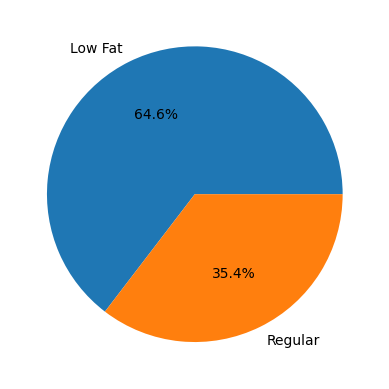

In [75]:
sales_by_fat=pdf.groupby("Item Fat Content")["Sales"].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%1.1f%%')

###               LOW FLAT PRODUCT HAS HIGHEST SALES 

# TOTAL SALES BY ITEM TYPES


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

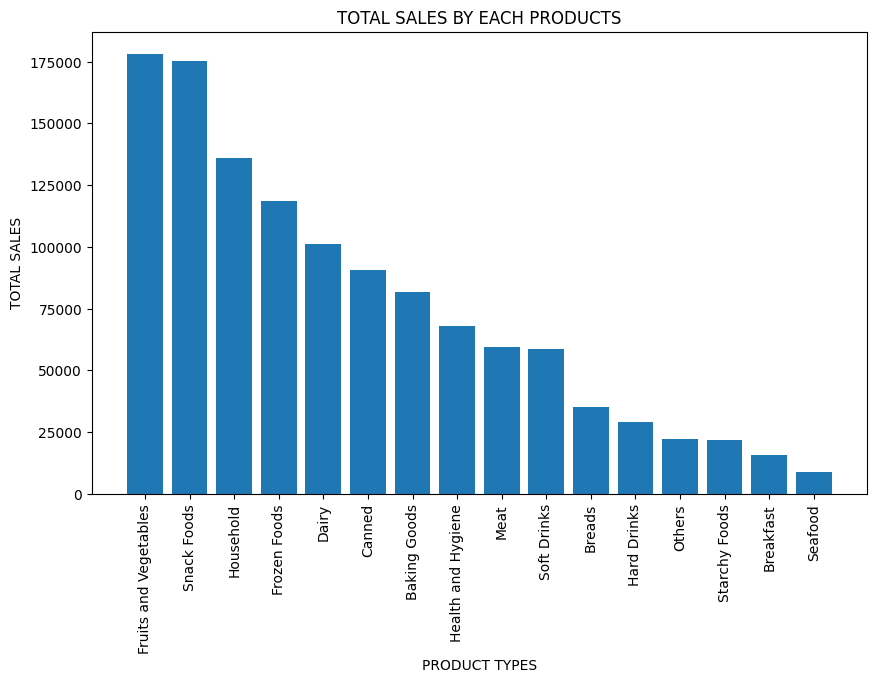

In [76]:
item_orders=pdf.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars=plt.bar(item_orders.index,item_orders.values)

plt.xticks(rotation=90)

plt.xlabel("PRODUCT TYPES")
plt.ylabel("TOTAL SALES")
plt.title("TOTAL SALES BY EACH PRODUCTS")

plt.tight_layout

# SNACK FOODS AND FRUITS AND VEGETABLES ARE MOST SELL ITEMS
# SEA FOODS AND BREAKFAST ARE POOR SELL ITEMS


FAT CONTENT BY OUTLET FOR TOTAL SALES

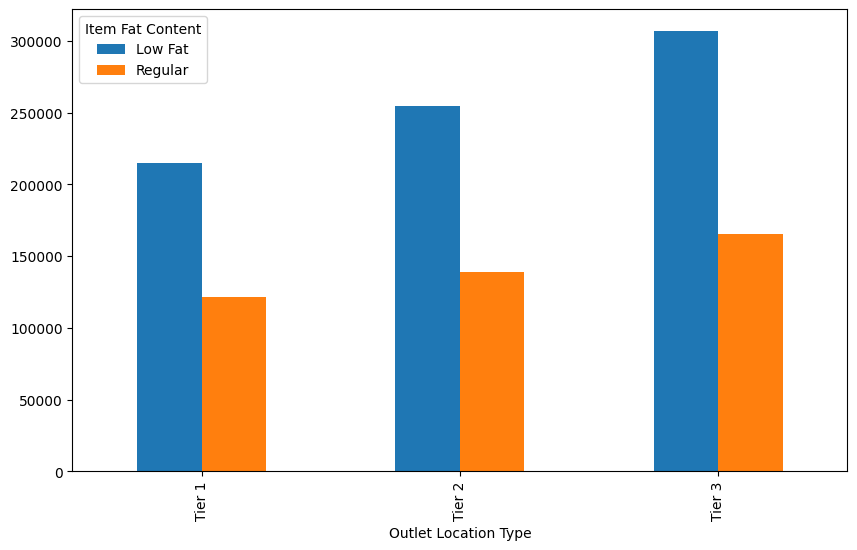

In [77]:
sale_by_outlet_age=pdf.groupby(["Outlet Location Type","Item Fat Content"])["Sales"].sum().unstack()
# grouped=sale_by_outlet_age[["Regular","Low Fat"]]
ax=sale_by_outlet_age.plot(kind="bar", figsize=(10,6))
plt.show()

# Tier 3 OUTLET LOCATION HAS MORE SALES IN REGULAR AND LOW FAT CONTENTS 

### TOTAL SALES BY OUTLET ESTABILISHED


Text(0.5, 1.0, 'TOTAL SALES BY OUTLET ESTABLISHMENT YEAR')

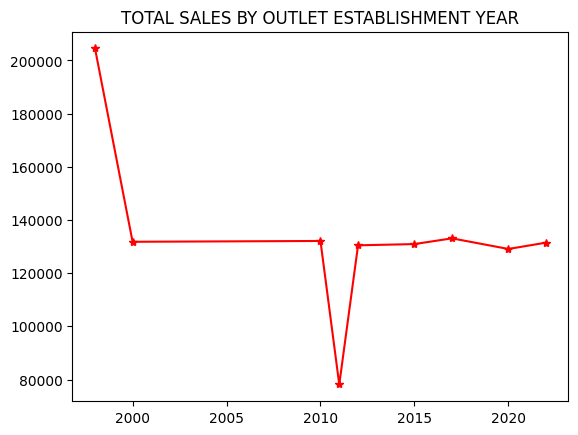

In [78]:
esta=pdf.groupby("Outlet Establishment Year")["Sales"].sum()
plt.plot(esta.index,esta.values,marker="*",color="red")
plt.title("TOTAL SALES BY OUTLET ESTABLISHMENT YEAR")


([<matplotlib.patches.Wedge at 0x22c7314a350>,
 [Text(0.8750618169957071, 0.6665334323469243, 'High'),
  Text(-0.9590008647047338, 0.5388110443333293, 'Medium'),
  Text(0.4364088728290166, -1.0097263469456006, 'Small')],
 [Text(0.47730644563402197, 0.3635636903710496, '20.7%'),
  Text(-0.5230913807480365, 0.29389693327272504, '42.3%'),
  Text(0.23804120336128173, -0.5507598256066912, '37.0%')])

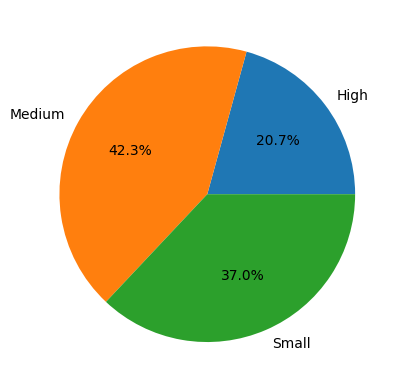

In [79]:
size=pdf.groupby(['Outlet Size'])["Sales"].sum()
plt.pie(size,labels=size.index,autopct="%1.1f%%")

## MEDIUM SIZE OUTLETS PERFORMS GOOD IN TOTAL SALES 

### SALES BY OUTLET LOCATION

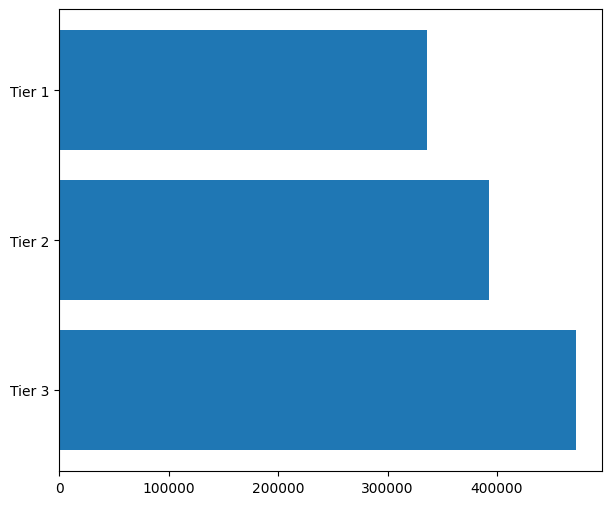

In [80]:
location=pdf.groupby(["Outlet Location Type"])["Sales"].sum().sort_index(ascending=False)
plt.figure(figsize=(7,6))
plt.barh(location.index,location.values)


plt.show()

### WHICH OUTLET TYPE GET MORE SALES

Text(0.5, 1.0, 'TOTAL SALES CONTRIBUTION OF OUTLET TYPES')

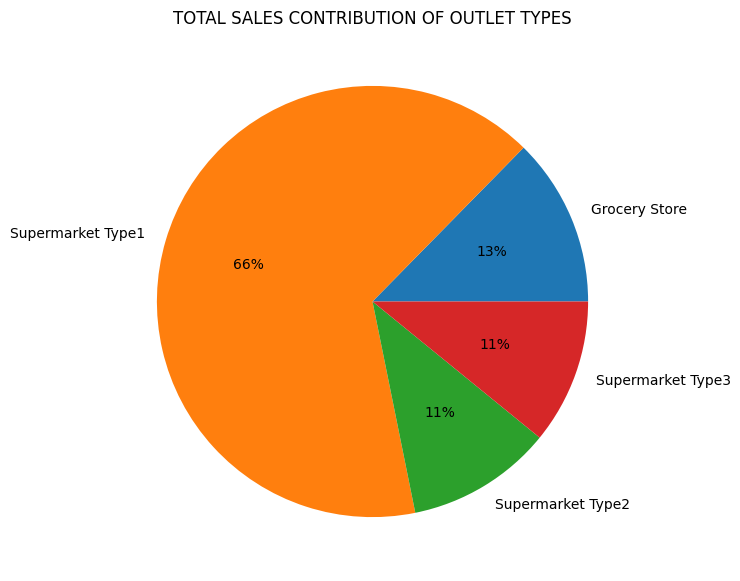

In [81]:
type=pdf.groupby(["Outlet Type"])["Sales"].sum()
plt.figure(figsize=(10,7))
plt.pie(type,labels=type.index,autopct="%1.f%%")
plt.title("TOTAL SALES CONTRIBUTION OF OUTLET TYPES")

# SUPERMARKET TYPE 1 HAS GOOD IN TOTAL SALE CONTRIBUTION